# Sound Classification Through Spectrograms

Dataset for this project is from [UrbanSounds8K](https://urbansounddataset.weebly.com/urbansound8k.html) that is a 10 class dataset of sounds less than 4seconds. Sounds are in one of these classes:

- 0 = air_conditioner
- 1 = car_horn
- 2 = children_playing
- 3 = dog_bark
- 4 = drilling
- 5 = engine_idling
- 6 = gun_shot
- 7 = jackhammer
- 8 = siren
- 9 = street_music

This notebook converts these sounds to a spectrogram then uses FastAI2 code base to classify these sounds. Code and approach in this notebook references work done by [Dipiam Vasani](https://towardsdatascience.com/sound-classification-using-images-68d4770df426) and associated sample code for converting sounds to spectrograms

##### 1. Download data from Urban to local system

In [31]:
import pandas as pd
from collections import OrderedDict

In [1]:
!wget https://goo.gl/8hY5ER
!tar xf 8hY5ER

--2022-04-29 05:50:29--  https://goo.gl/8hY5ER
Resolving goo.gl (goo.gl)... 142.251.12.102, 142.251.12.113, 142.251.12.138, ...
Connecting to goo.gl (goo.gl)|142.251.12.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz [following]
--2022-04-29 05:50:29--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘8hY5ER’

100%[====================================>] 6,023,741,708 2.54MB/s   in 28m 20s

2022-04-29 06:18:51 (3.38 MB/s) - ‘8hY5ER’ saved [6023741708/6023741708]



In [133]:
df = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [110]:
classes = OrderedDict(sorted(df.set_index('classID').to_dict()['class'].items()))
classes

OrderedDict([(0, 'air_conditioner'),
             (1, 'car_horn'),
             (2, 'children_playing'),
             (3, 'dog_bark'),
             (4, 'drilling'),
             (5, 'engine_idling'),
             (6, 'gun_shot'),
             (7, 'jackhammer'),
             (8, 'siren'),
             (9, 'street_music')])

In [3]:
!ls UrbanSound8K/audio/

fold1  fold10  fold2  fold3  fold4  fold5  fold6  fold7  fold8	fold9


In [4]:
import IPython
IPython.display.Audio("UrbanSound8K/audio/fold1/26270-9-0-35.wav")

Text(0.5, 1.0, 'Class distribution in the dataset')

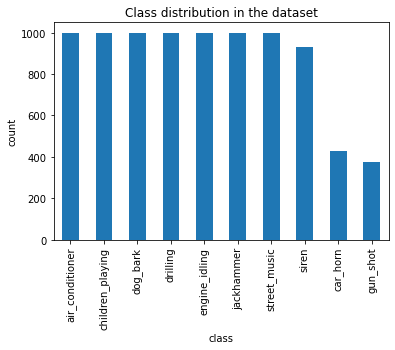

In [34]:
df.groupby('class').classID.count().sort_values(ascending=False).plot.bar()
plt.ylabel('count')
plt.title('Class distribution in the dataset')

##### Conver wav files to spectrograms

In [5]:
!mkdir 'UrbanSound8K/spectrogram'

In [22]:
!pip install librosa
!pip install fastai>2.0.0

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [24]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa
import librosa.display
import numpy as np
from pathlib import Path
import os
import random

In [10]:
spectrogram_path = Path('UrbanSound8K/spectrogram/')  
audio_path = Path('UrbanSound8K/audio/')

In [21]:
for fold in np.arange (1,10):
    print(f'Processing fold {fold}')
    try:
        os.mkdir(spectrogram_path/str(fold))
    except:
        pass #Folder exists
    for audio_file in list(Path(audio_path/f'fold{fold}').glob('*.wav')):
        samples, sample_rate = librosa.load(audio_file)
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        filename  = spectrogram_path/str(fold)/Path(audio_file).name.replace('.wav','.png')
        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close('all')

Processing fold 1


/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)


Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
Processing fold 6
Processing fold 7
Processing fold 8
Processing fold 9


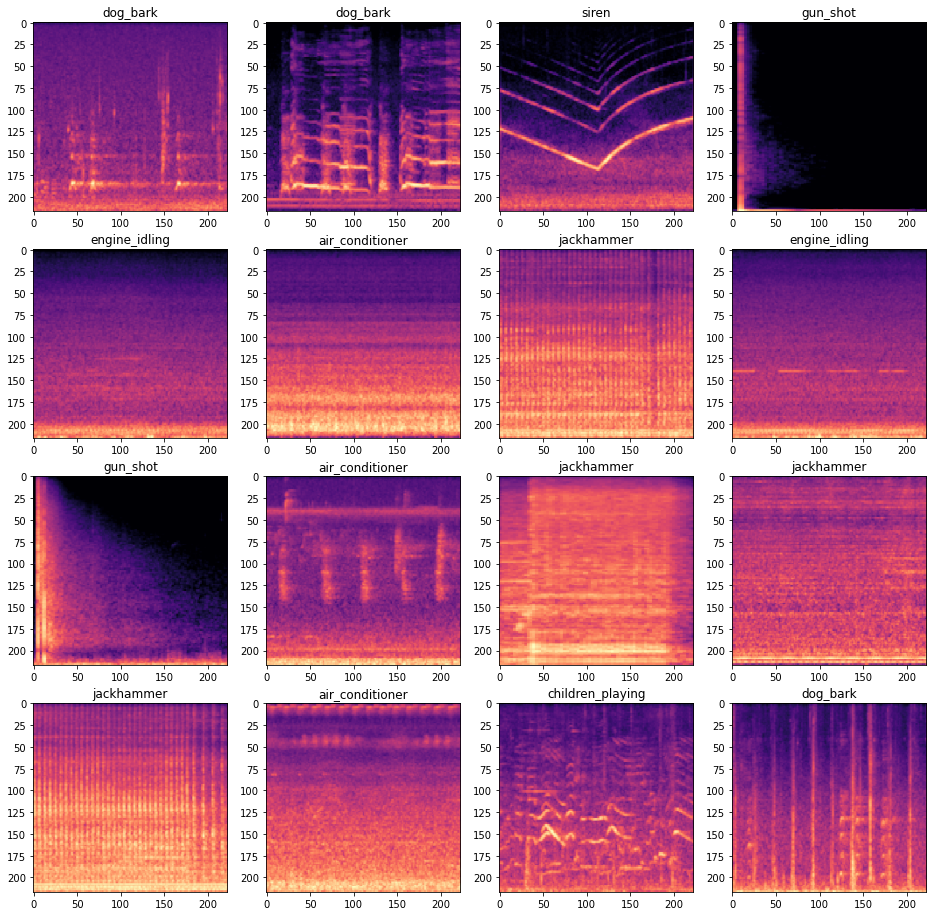

In [35]:
fig, ax = plt.subplots(4,4, figsize=(16,16))
for i in range(4):
    for j in range(4):
        rand = random.choice(os.listdir('UrbanSound8K/spectrogram/1/'))
        img = plt.imread('UrbanSound8K/spectrogram/1/'+ rand)
        label = classes[int(rand.split('-')[1])]
        ax[i][j].imshow(img)
        ax[i][j].set_title(label)


##### Fast AI classification of these spectrograms

In [38]:
from fastai.vision.all import *

In [127]:
path = 'UrbanSound8K/spectrogram/'

In [55]:
files = get_image_files(path)
len(files)

7895

In [135]:
df['fname'] = df[['slice_file_name','fold']].apply (lambda x: str(x['slice_file_name'][:-4])+'.png',axis=1 )

In [136]:
df.set_index('fname',inplace=True)

In [137]:
df[['class']].head()

,class
fname,
100032-3-0-0.png,dog_bark
100263-2-0-117.png,children_playing
100263-2-0-121.png,children_playing
100263-2-0-126.png,children_playing
100263-2-0-137.png,children_playing


In [138]:
def label_func(f_name):
    return df.loc[f_name,'class']

In [122]:
label_func('UrbanSound8K/spectrogram/1/180937-7-4-10.png')

'jackhammer'

In [139]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=label_func, item_tfms=Resize(224))

In [140]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.577608,0.804202,0.245725,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.588044,0.386261,0.120329,00:24


SuggestedLRs(valley=7.585775892948732e-05)

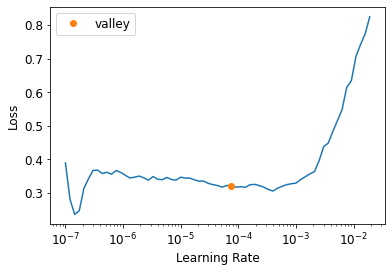

In [141]:
learn.lr_find()

In [142]:
learn.fine_tune(5, 7e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.303771,0.362357,0.108296,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.278691,0.345586,0.112096,00:24
1,0.262426,0.325998,0.101963,00:24
2,0.238270,0.317977,0.105763,00:24
3,0.224901,0.305006,0.099430,00:24
4,0.209228,0.304044,0.096897,00:24


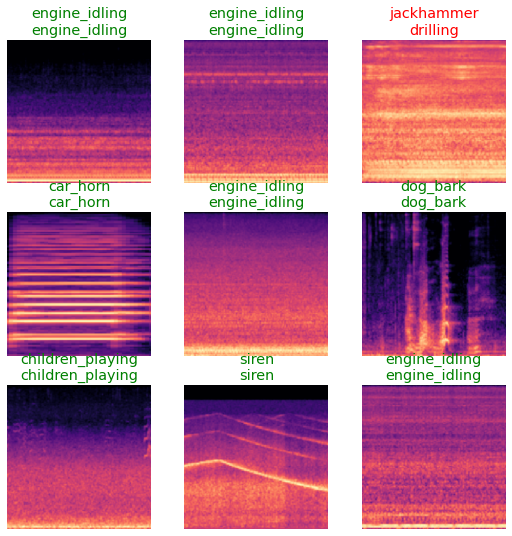

In [143]:
learn.show_results()